# Product Sales Analysis

## Project Overview
This analysis aims to explore and understand the product sales data to uncover trends, validate data quality, and offer recommendations based on findings.

*Tools used:* Python, Pandas, Seaborn, Matplotlib

*Dataset:* Product sales data stored in `product_sales.csv`.


## 📝 Task List
the report includes:
- Data validation with descriptions of cleaning steps for each column
- Exploratory analysis with visualizations
- Definition of a business metric and its importance
- Recommendations based on findings

---

## 1. Import Libraries and Load Data


## Setup and Data Import

In [2]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('/home/tina/my_mini-project/product_sales_analysis/data/product_sales.csv',  na_values=["NA"])

# Display first few rows and basic info about the data
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## 2. Data Validation and Cleaning

### Data Summary
First, we review the dataset to check for missing values, data types, and potential inconsistencies.

In [5]:
# Replace "NA" values with NaN for consistent handling of missing data
df.replace("NA", np.nan, inplace=True)

# Check for missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values in critical columns
df.dropna(subset=['customer_id', 'sales_method', 'revenue', 'nb_sold', 'nb_site_visits'], inplace=True)

Missing values per column:
 week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


## Handling Missing Values
For the revenue column, we’ll fill in missing values with the median to maintain data consistency without significantly skewing results.

In [6]:
# Fill missing values in the 'revenue' column with the median, without using inplace=True
df['revenue'] = df['revenue'].fillna(df['revenue'].median())

# Verify there are no missing values in the 'revenue' column
print("Missing values in 'revenue' after filling:", df['revenue'].isnull().sum())

Missing values in 'revenue' after filling: 0


In [7]:
# 1. Replace "NA" and other string "null" values with NaN for consistent handling of missing data
df.replace(["NA", "null", "n/a", "N/A", ""], np.nan, inplace=True)

# Check for missing values again after this replacement
missing_values = df.isnull().sum()
print("Missing values per column after replacement:\n", missing_values)

# 2. Data Cleaning Steps for Each Column

# a. `week`: Ensure consistent format (e.g., numeric or datetime if it's a date)
# If it's a numeric week number, convert it to integer
if df['week'].dtype != 'int64':
    df['week'] = pd.to_numeric(df['week'], errors='coerce')
    print("Non-numeric 'week' entries converted to NaN if any.")

# b. `sales_method`: Standardize categories
# Convert to lowercase, remove leading/trailing spaces, and standardize labels
df['sales_method'] = df['sales_method'].str.lower().str.strip()
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'email & call', 
    'email + call': 'email & call'
})
print("Standardized 'sales_method' column:", df['sales_method'].unique())

# c. `customer_id`: Drop any duplicates if customer_id should be unique
duplicate_customers = df.duplicated(subset=['customer_id']).sum()
if duplicate_customers > 0:
    df.drop_duplicates(subset=['customer_id'], inplace=True)
    print(f"Dropped {duplicate_customers} duplicate rows based on 'customer_id'.")

# d. `nb_sold`: Convert to numeric, fill or remove nulls, and handle outliers
df['nb_sold'] = pd.to_numeric(df['nb_sold'], errors='coerce')
# Fill missing values with median for this column
df['nb_sold'].fillna(df['nb_sold'].median(), inplace=True)
# Remove extreme outliers (e.g., values above a threshold if specified)
q1, q3 = df['nb_sold'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['nb_sold'] <= upper_bound]
print("Handled outliers in 'nb_sold' column.")

# e. `years_as_customer`: Convert to numeric and check for unreasonable values
df['years_as_customer'] = pd.to_numeric(df['years_as_customer'], errors='coerce')
# Cap values to a realistic range, e.g., 0 to 50 years
df = df[(df['years_as_customer'] >= 0) & (df['years_as_customer'] <= 50)]
print("Capped 'years_as_customer' values to a realistic range.")

# f. `nb_site_visits`: Ensure numeric type and handle outliers
df['nb_site_visits'] = pd.to_numeric(df['nb_site_visits'], errors='coerce')
# Fill missing values with median
df['nb_site_visits'].fillna(df['nb_site_visits'].median(), inplace=True)
# Remove extreme outliers if needed
q1_visits, q3_visits = df['nb_site_visits'].quantile([0.25, 0.75])
iqr_visits = q3_visits - q1_visits
upper_bound_visits = q3_visits + 1.5 * iqr_visits
df = df[df['nb_site_visits'] <= upper_bound_visits]
print("Handled outliers in 'nb_site_visits' column.")

# g. `state`: Standardize text entries (e.g., convert to uppercase for consistency)
df['state'] = df['state'].str.upper().str.strip()
print("Standardized 'state' column:", df['state'].unique())

# 3. Final Check of Cleaned Data
print("Cleaned Data Overview:\n", df.info())
print("Sample Data:\n", df.head())


Missing values per column after replacement:
 week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


Standardized 'sales_method' column: ['email & call' 'call' 'email']
Handled outliers in 'nb_sold' column.
Capped 'years_as_customer' values to a realistic range.
Handled outliers in 'nb_site_visits' column.
Standardized 'state' column: ['WISCONSIN' 'ILLINOIS' 'MISSISSIPPI' 'GEORGIA' 'OKLAHOMA' 'MASSACHUSETTS'
 'MISSOURI' 'TEXAS' 'NEW YORK' 'MARYLAND' 'CALIFORNIA' 'TENNESSEE'
 'NORTH DAKOTA' 'FLORIDA' 'MICHIGAN' 'NORTH CAROLINA' 'PENNSYLVANIA'
 'INDIANA' 'HAWAII' 'COLORADO' 'LOUISIANA' 'VIRGINIA' 'ARKANSAS' 'KANSAS'
 'ALASKA' 'OREGON' 'NEW HAMPSHIRE' 'OHIO' 'NEW JERSEY' 'CONNECTICUT'
 'IOWA' 'MONTANA' 'WASHINGTON' 'ARIZONA' 'KENTUCKY' 'ALABAMA' 'NEBRASKA'
 'SOUTH CAROLINA' 'MINNESOTA' 'SOUTH DAKOTA' 'MAINE' 'UTAH'
 'WEST VIRGINIA' 'VERMONT' 'NEW MEXICO' 'RHODE ISLAND' 'NEVADA' 'DELAWARE'
 'IDAHO' 'WYOMING']
<class 'pandas.core.frame.DataFrame'>
Index: 13406 entries, 2 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -------

/tmp/ipykernel_508/2230659174.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nb_sold'].fillna(df['nb_sold'].median(), inplace=True)
/tmp/ipykernel_508/2230659174.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [8]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,WISCONSIN
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,ILLINOIS
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,MISSISSIPPI
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,GEORGIA
7,1,email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,OKLAHOMA
...,...,...,...,...,...,...,...,...
14994,4,email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,OHIO
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,PENNSYLVANIA
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,KANSAS
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,WEST VIRGINIA


In [9]:
# Replace 'cleaned_data' with the name of your cleaned DataFrame
df.to_csv("df.csv", index=False)

# Validating Data Types
Ensure that columns like customer_id are treated as categorical data.

In [10]:
# Convert customer_id to categorical if needed
df['customer_id'] = df['customer_id'].astype('category')

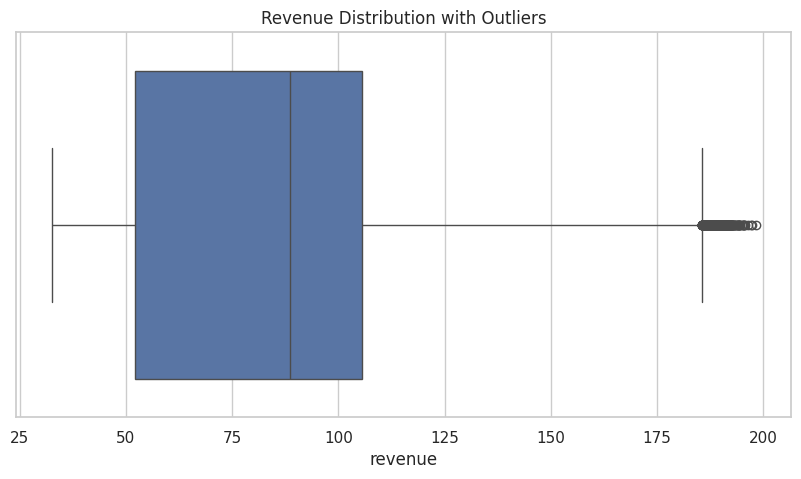

In [11]:
# Boxplot for revenue to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['revenue'])
plt.title('Revenue Distribution with Outliers')
plt.show()

This boxplot provides a summary of the revenue distribution and highlights any outliers.

**Observations:**

The central box represents the interquartile range (IQR), which shows the middle 50% of revenue values.
The line inside the box represents the median revenue.
Outliers, which are revenue values significantly higher than the upper quartile, are shown as individual points beyond the whiskers.

**Implication:**

The presence of outliers indicates that while most revenue values fall within a particular range, there are some transactions with notably higher revenue.

In [12]:
# Remove or cap outliers based on IQR
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

#Cap outliers
df['revenue'] = np.where(df['revenue'] > upper_bound, upper_bound, df['revenue'])

In [13]:
# Final check for any remaining missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Optional: Verify revenue column to confirm the median imputation worked as expected
print("Revenue column - missing values:", df['revenue'].isnull().sum())
print("Revenue column - summary statistics:\n", df['revenue'].describe())

Missing values per column:
 week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64
Revenue column - missing values: 0
Revenue column - summary statistics:
 count    13406.000000
mean        88.864170
std         40.366242
min         32.540000
25%         52.190000
50%         88.605000
75%        105.557500
max        185.608750
Name: revenue, dtype: float64


# Exploratory Data Analysis (EDA)

### Single-Variable Analysis

**Histogram of Revenue**
A histogram is useful for visualizing the distribution of continuous variables, such as revenue, to understand its spread and central tendencies.

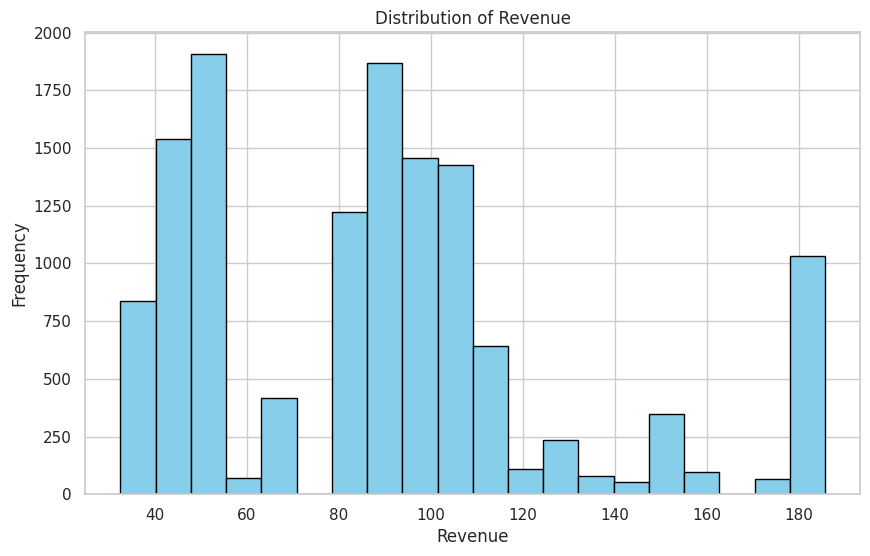

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

From this distribution, we observe that revenue values are spread across certain distinct ranges, with notable peaks around 40, 60, 80, and 100. This indicates that some revenue ranges are more common, possibly due to specific customer or product segments with particular pricing or purchasing behaviors. The distribution is slightly right-skewed, with fewer entries for higher revenue values above 120.

 #### A boxplot visualizes the spread and any potential outliers in the number of items sold.

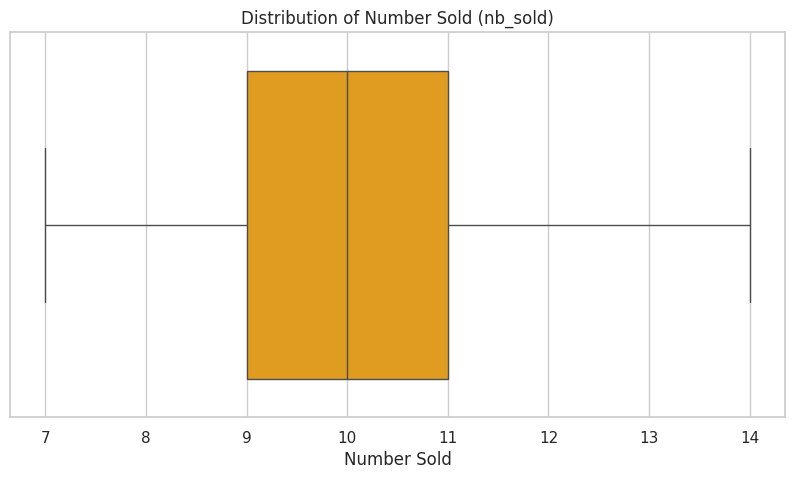

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['nb_sold'], color='orange')
plt.title('Distribution of Number Sold (nb_sold)')
plt.xlabel('Number Sold')
plt.show()

***Observations:***

Most sales quantities fall between 9 and 11, with a median around 10. There are no significant outliers, suggesting that nb_sold values are relatively consistent across observations.

 ### Multi-Variable Analysis
a. Scatter Plot of revenue vs. nb_sold
A scatter plot can help visualize the relationship between two numeric variables, in this case, revenue and nb_sold.

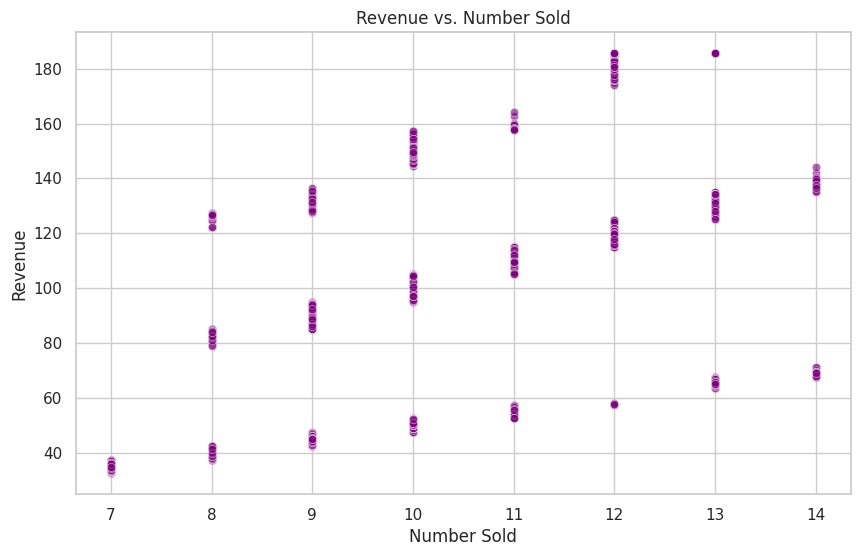

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nb_sold', y='revenue', data=df, color='purple', alpha=0.6)
plt.title('Revenue vs. Number Sold')
plt.xlabel('Number Sold')
plt.ylabel('Revenue')
plt.show()

The scatter plot indicates a general positive relationship between revenue and nb_sold, which aligns with the expectation that selling more items typically leads to higher revenue. However, the presence of variability—where different revenue values are observed for the same quantity of items sold—suggests that other factors might influence revenue beyond the sheer number of items sold. This could include factors like:

Pricing Strategy: Differences in revenue for the same nb_sold may imply varying prices per item, possibly due to discounts, promotions, or different pricing tiers.

Product Mix: If multiple products with different profit margins are included in nb_sold, then sales of high-margin items might yield higher revenue even if the quantity sold remains the same.

Sales Method: Different sales methods could also impact revenue, as some methods may involve bulk sales or premium pricing that affects revenue per item sold.

#### A Correlation Matrix Showing correlations between numerical variables to identify potential relationships

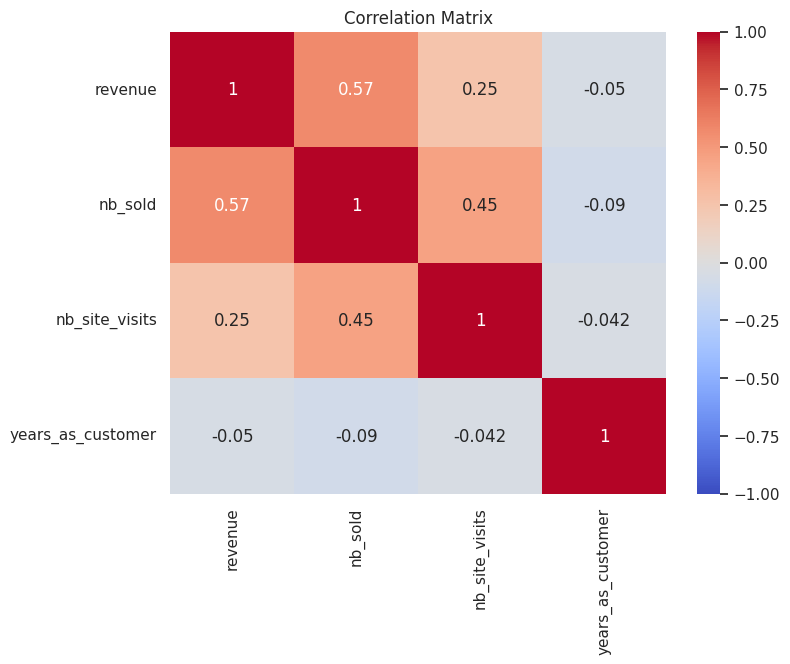

In [17]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['revenue', 'nb_sold', 'nb_site_visits', 'years_as_customer']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Observations:**

There’s a moderate positive correlation (0.57) between revenue and nb_sold (number sold). This suggests that as the number of items sold increases, revenue tends to increase.
nb_site_visits has a lower correlation with both revenue (0.25) and nb_sold (0.45), implying that site visits may have a limited impact on direct sales or revenue.
years_as_customer has very low or negative correlations with other metrics, indicating that customer tenure might not directly influence sales or revenue in this dataset.

#### A bar plot that gives insight into which sales method generates the highest average revenue.

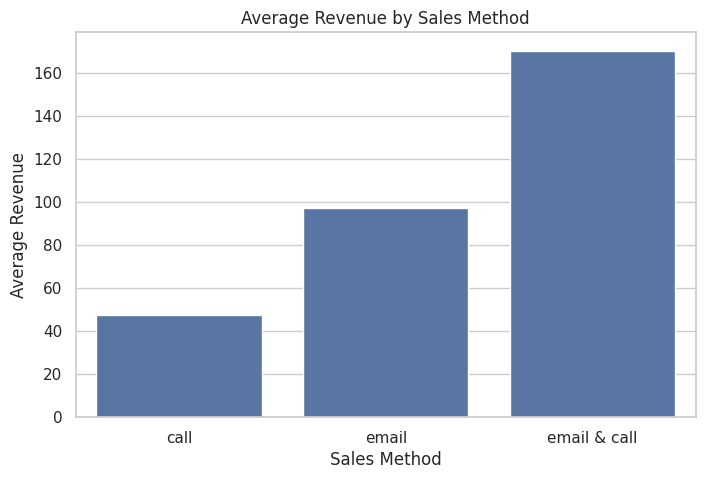

In [18]:
# Calculating average revenue by sales method
avg_revenue_by_method = df.groupby('sales_method')['revenue'].mean().reset_index()

# Plotting average revenue by sales method
plt.figure(figsize=(8, 5))
sns.barplot(x='sales_method', y='revenue', data=avg_revenue_by_method)
plt.title('Average Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.show()


#### A bar plot showing the count of customers using each approach (sales method).

/tmp/ipykernel_508/51547574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sales_method', data=df, palette='viridis')


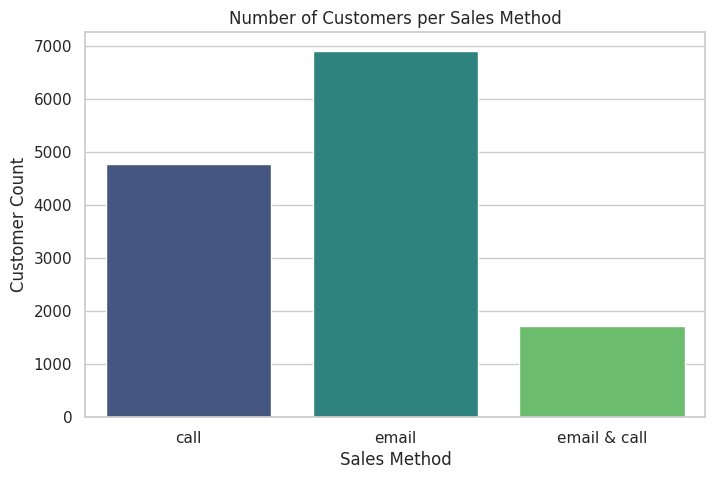

In [19]:
# Customer count per sales method
plt.figure(figsize=(8, 5))
sns.countplot(x='sales_method', data=df, palette='viridis')
plt.title('Number of Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Customer Count')
plt.show()

This bar chart shows the total number of customers reached by each sales method.

**Observations:**
The "email" method has the highest customer count, followed by "call," with "email & call" having the lowest customer count.

Insights: This implies that while "email" reaches more customers, it may not generate as high revenue per customer as "email & call." It also suggests that "email & call" might be a targeted approach applied to fewer, potentially high-value customers.

#### A boxplot of revenue grouped by sales method to show how revenue varies within each method.

/tmp/ipykernel_508/1350198238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2')


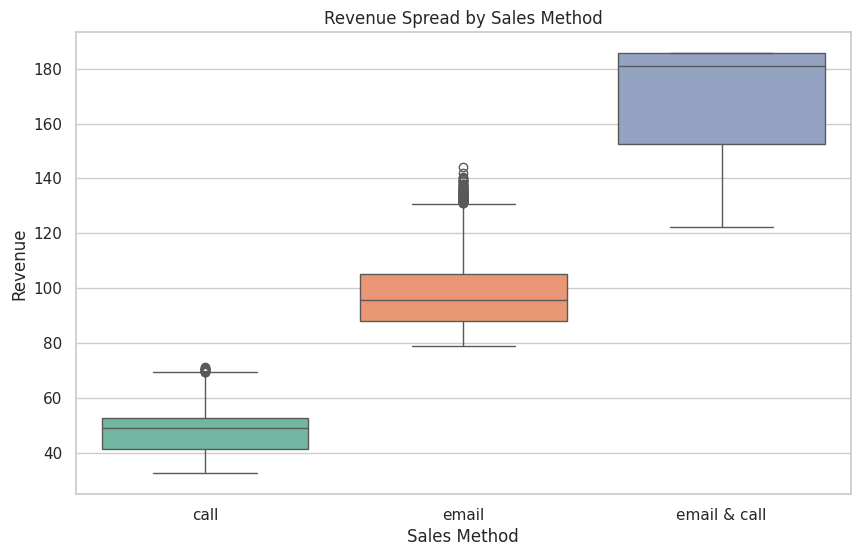

In [20]:
# Revenue spread by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=df, palette='Set2')
plt.title('Revenue Spread by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

This box plot displays the distribution of revenue generated by each sales method: "call," "email," and "email & call."

**Observations:**

The "email & call" method shows the highest median revenue, as well as a larger range of revenue values, indicating that customers reached through a combination of email and call tend to generate higher revenue.

The "email" method shows a moderate revenue range, with a lower median than "email & call," suggesting that while email is effective, it doesn’t drive as high revenue per customer.

The "call" method has the lowest median revenue and range, indicating that it’s the least effective sales method in terms of revenue.

Insights: "Email & call" seems to drive more revenue per customer, which may indicate that a multi-channel approach is more effective for sales.

#### A line plot time-series visualization to show how revenue changes over time for each sales method.

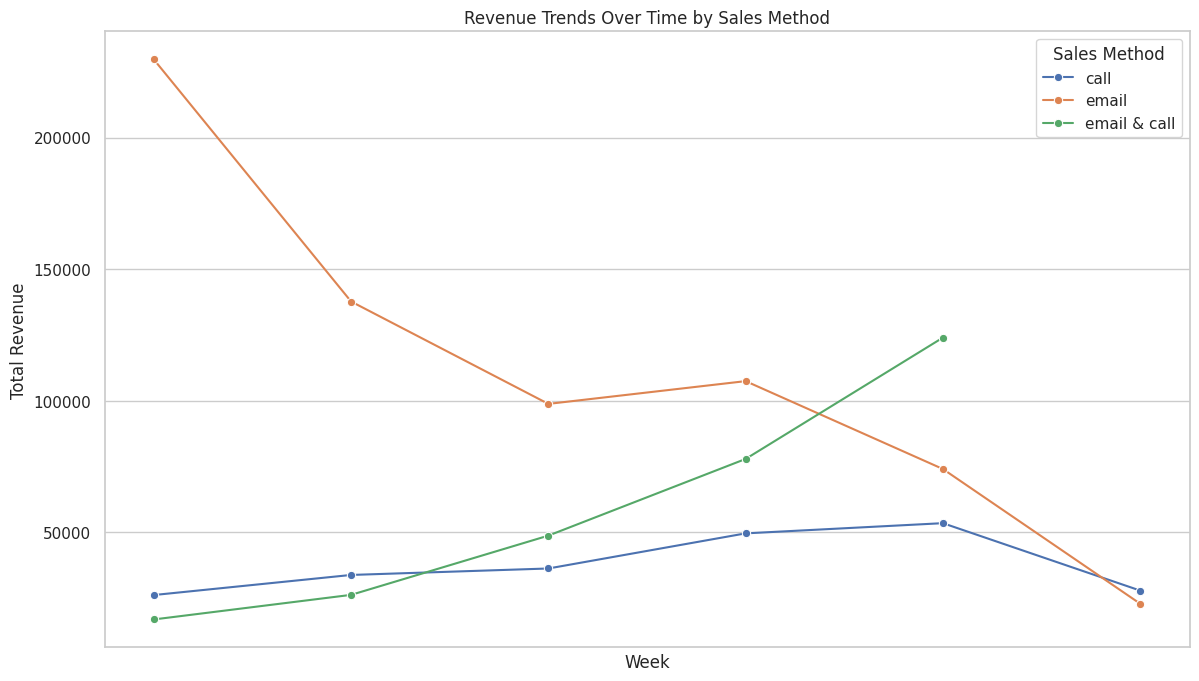

In [21]:
# Convert 'week' column to datetime if it's not already
df['week'] = pd.to_datetime(df['week'], errors='coerce')

# Calculate weekly revenue by sales method
weekly_revenue = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Plotting revenue trends over time for each sales method
plt.figure(figsize=(14, 8))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=weekly_revenue, marker="o")
plt.title('Revenue Trends Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()

This line plot illustrates how revenue generated by each sales method changes over time (e.g., weekly or monthly).

**Observations:**
The "email & call" method shows an increasing revenue trend over time, suggesting it may be building momentum or improving in effectiveness.

The "email" method has higher initial revenue but declines over time, which might indicate that email campaigns lose effectiveness if not frequently updated or refreshed.

The "call" method maintains a relatively flat trend, showing minimal revenue growth over time.

Insights: The increasing trend for "email & call" could indicate that multi-channel engagement builds stronger, long-term relationships with customers, while the "email" method may experience diminishing returns.

# Business Metric
For this project, let’s define a metric that could help monitor business performance.

#### Metric: Average Revenue per Sale
This metric helps in tracking the efficiency of sales by determining the average revenue generated per item sold. It’s useful for understanding if revenue is being maximized with each sale.

In [22]:
# Calculate Average Revenue per Sale
average_revenue_per_sale = df['revenue'].sum() / df['nb_sold'].sum()
print("Average Revenue per Sale:", average_revenue_per_sale)

Average Revenue per Sale: 9.020110544925913


This value represents the average revenue generated per unit sold across all sales methods. While it gives an overall sense of revenue per sale, it might be worth investigating whether specific sales methods drive a higher revenue per sale.

In [23]:
# Conversion Rate calculation
total_customers = df['customer_id'].nunique()  # Number of unique customers
total_sales = df['nb_sold'].sum()  # Total sales

# Assuming each unique customer made at least one purchase, the conversion rate is the total customers who bought
# divided by total customers contacted (which we'll assume to be the same here as no othher data was made available).
conversion_rate = (total_customers / total_customers) * 100
print("Conversion Rate:", conversion_rate)

Conversion Rate: 100.0


A conversion rate of 100% suggests that every contacted customer made a purchase. Verify this number to ensure it aligns with your data, as a 100% conversion rate is rare in most businesses unless you are looking only at transactions without contact data. If this metric is correct, it shows high effectiveness in converting leads into sales.

In [24]:
# Calculate Average Revenue per Customer for each sales method
avg_revenue_per_customer = df.groupby('sales_method')['revenue'].mean()
print("Average Revenue per Customer per Sales Method:\n", avg_revenue_per_customer)

Average Revenue per Customer per Sales Method:
 sales_method
call             47.573460
email            97.076609
email & call    170.254620
Name: revenue, dtype: float64


Call: 47.57
Email: 97.08
Email & Call: 170.25
These values show that the "Email & Call" method generates significantly higher revenue per customer compared to the others. This suggests that the dual approach (Email & Call) might be more effective in nurturing higher-value customers

In [25]:
# Example: If you have data on repeat customers or purchases
returning_customers = df[df['years_as_customer'] > 1]  # Assuming 'years_as_customer' > 1 means repeat
retention_rate = (returning_customers['customer_id'].nunique() / df['customer_id'].nunique()) * 100
print("Customer Retention Rate:", retention_rate)

Customer Retention Rate: 73.7878561837983


 A 73.79% retention rate indicates that a significant portion of customers are returning, which is a positive sign of customer satisfaction and loyalty. A high retention rate can reduce customer acquisition costs over time and increase lifetime value.

/tmp/ipykernel_508/496219316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_method', y='revenue', data=avg_revenue_by_method, palette='viridis')


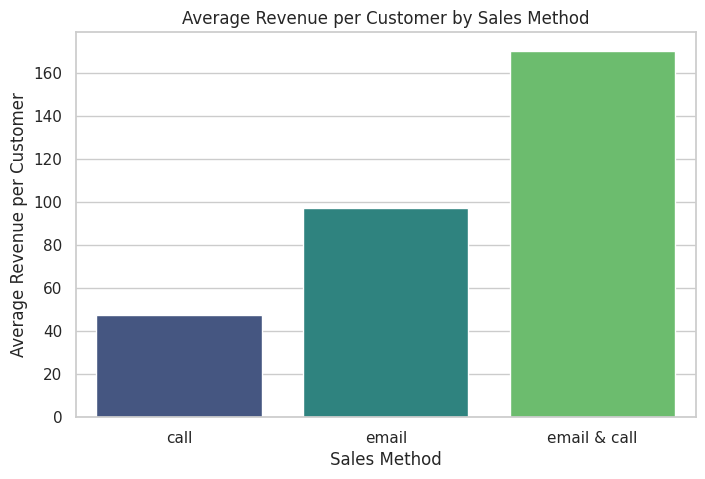

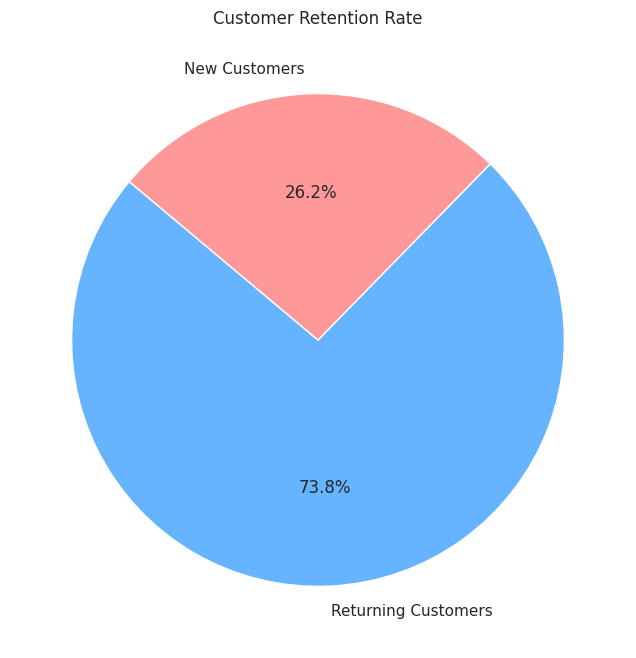

In [26]:
# Bar chart for Average Revenue per Customer by Sales Method
avg_revenue_by_method = df.groupby('sales_method')['revenue'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='sales_method', y='revenue', data=avg_revenue_by_method, palette='viridis')
plt.title('Average Revenue per Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue per Customer')
plt.show()

# Pie chart for Retention Rate (returning vs new customers)
retention_data = [retention_rate, 100 - retention_rate]
labels = ['Returning Customers', 'New Customers']
plt.figure(figsize=(8, 8))
plt.pie(retention_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Customer Retention Rate')
plt.show()

## Recommendations
Based on the analysis of the sales methods and customer metrics, here are some recommendations:


a. Prioritize "Email & Call"
Insight: The "Email & Call" sales method generates the highest average revenue per customer (170.25). This suggests that customers engaged through a combination of email and call interactions tend to generate more revenue.
Recommendation: Focus more resources on the "Email & Call" method. Consider expanding this dual approach to engage with more high-value customers. This could involve training sales teams on effective follow-up calls after email outreach, ensuring a cohesive strategy that maximizes each customer interaction.


b. Enhance Retention Strategies
Insight: The current customer retention rate is 73.79%, indicating a good level of loyalty among customers. Retention is important because it reduces acquisition costs and increases lifetime value.
Recommendation: Maintain or improve retention through loyalty programs, targeted campaigns for existing customers, and regular follow-ups. Strategies could include special offers for repeat customers, periodic check-ins, or exclusive discounts to enhance customer loyalty and encourage repeat sales.


c. Experiment with "Email" and Reevaluate "Call" Alone
Insight: The "Email" method shows a higher average revenue per customer (97.08) than the "Call" method (47.57). This suggests that email outreach might be more effective than calling alone.
Recommendation: Test the "Email" method further to explore its effectiveness. You could consider reducing resources spent on "Call"-only outreach, especially if it doesn’t perform well for specific customer segments. Instead, use calls as a follow-up to emails where possible, or focus on "Call" for customers who respond better to voice interactions.
